In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import gzip

In [2]:
df=pd.read_csv('bankloan.csv')

In [3]:
df=df.drop('Loan_ID',axis=1)

In [4]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
numerical_features = df.select_dtypes(include='number').columns
df[numerical_features] = df[numerical_features].fillna(df[numerical_features].mean())

# Impute missing values in categorical features with mode
categorical_features = df.select_dtypes(include='object').columns
df[categorical_features] = df[categorical_features].fillna(df[categorical_features].mode().iloc[0])

In [6]:
for i in df['Property_Area']:
    df['Property_Area'].replace(['Urban','Rural','Semiurban'],['0','1','2'],inplace=True)

In [7]:
df.dtypes


Gender                object
Married               object
Dependents           float64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
column_of_string=['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']
for i in df['Gender']:
    df['Gender'].replace(['Male','Female'],['0','1'],inplace=True)

for i in df['Married']:
    df['Married'].replace(['No','Yes'
    ],['0','1'],inplace=True)
for i in df['Education']:
    df['Education'].replace(['Graduate','Not Graduate'],['0','1'],inplace=True)

for i in df['Self_Employed']:
    df['Self_Employed'].replace(['No','Yes'],['0','1'],inplace=True)


    


In [9]:
for i in df['Loan_Status']:
    df['Loan_Status'].replace(['Y','N'],['0','1'],inplace=True)

In [10]:
exchange_rate=82.73
df['ApplicantIncome']=df['ApplicantIncome']*exchange_rate
df['CoapplicantIncome']=df['CoapplicantIncome']*exchange_rate
df['LoanAmount']=df['LoanAmount']*exchange_rate
# df['LoanAmount']=df['LoanAmount']*exchange_rate


In [11]:
for i in df['Self_Employed']:
    df['Self_Employed'].replace(['No','Yes'],['0','1'],inplace=True)

In [12]:
y=df.pop('Loan_Status')
x=df

In [13]:
x.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [14]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [49]:
estimators=[]
estimators.append(('logistic',LogisticRegression()))
estimators.append(('cart',DecisionTreeClassifier()))
estimators.append(('svm',SVC()))
# estimators.append(('rf',RandomForestClassifier()))

In [50]:
ensemble=VotingClassifier(estimators,voting='hard')

In [51]:
pipe=Pipeline([
    ('imputer',SimpleImputer()),
    ('scaler',MinMaxScaler()),
    ('model',ensemble)
])

In [52]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', MinMaxScaler()),
                ('model',
                 VotingClassifier(estimators=[('logistic',
                                               LogisticRegression()),
                                              ('cart',
                                               DecisionTreeClassifier()),
                                              ('svm', SVC())]))])

In [53]:
pipe.score(X_test,y_test)

0.7886178861788617

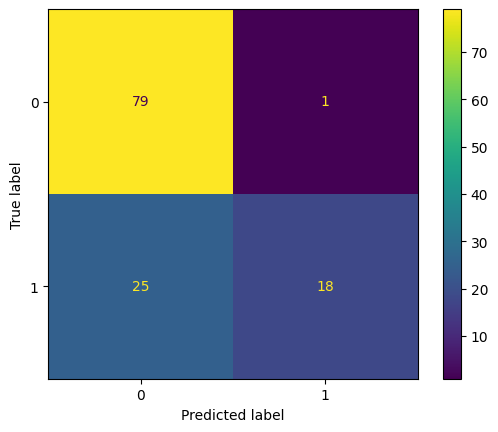

In [28]:
ConfusionMatrixDisplay.from_estimator(pipe,X_test,y_test)

In [56]:
joblib.dump(pipe,'model_Bankloan.pkl')
# Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
#        'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
#        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
#       dtype='object')

['model_Bankloan.pkl']

In [55]:
pipe.predict(X_test)

array(['0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '0', '0',
       '1', '0', '0', '0', '0', '0', '1', '0', '1', '0', '1', '0', '0',
       '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0', '0', '1',
       '1', '0', '0', '0', '0', '0', '0', '0', '0', '1', '0', '0', '0',
       '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '1', '0', '0', '0', '1', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0'], dtype=object)

In [47]:
score=cross_val_score(ensemble,X_train,y_train,cv=2)
for fold,score in enumerate(score,5):
    print(f"Accuracy {fold}score:{score:.2f}")

Accuracy 5score:0.69
Accuracy 6score:0.70
